# rule based feature 추출

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from extract_rule_based_features import ExtractFeatures, detect_bead
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

%matplotlib inline

## Anode

In [2]:
Anode_Normal = sorted([x for x in Path("../data/230507/Anode/Normal").glob("*.csv")])
Anode_Normal

[PosixPath('../data/230507/Anode/Normal/1.csv'),
 PosixPath('../data/230507/Anode/Normal/10.csv'),
 PosixPath('../data/230507/Anode/Normal/11.csv'),
 PosixPath('../data/230507/Anode/Normal/12.csv'),
 PosixPath('../data/230507/Anode/Normal/14.csv'),
 PosixPath('../data/230507/Anode/Normal/15.csv'),
 PosixPath('../data/230507/Anode/Normal/16.csv'),
 PosixPath('../data/230507/Anode/Normal/17.csv'),
 PosixPath('../data/230507/Anode/Normal/18.csv'),
 PosixPath('../data/230507/Anode/Normal/19.csv'),
 PosixPath('../data/230507/Anode/Normal/2.csv'),
 PosixPath('../data/230507/Anode/Normal/20.csv'),
 PosixPath('../data/230507/Anode/Normal/20230412_110032_0__03_Total.csv'),
 PosixPath('../data/230507/Anode/Normal/21.csv'),
 PosixPath('../data/230507/Anode/Normal/22.csv'),
 PosixPath('../data/230507/Anode/Normal/23.csv'),
 PosixPath('../data/230507/Anode/Normal/24.csv'),
 PosixPath('../data/230507/Anode/Normal/25.csv'),
 PosixPath('../data/230507/Anode/Normal/26.csv'),
 PosixPath('../data/230507/

In [3]:
Anode_Abnormal = sorted([x for x in Path("../data/230507/Anode/Abnormal").glob("*.csv")])
Anode_Abnormal

[PosixPath('../data/230507/Anode/Abnormal/20230412_105553_0__01_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_105804_0__02_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_110249_0__04_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_110451_0__05_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_110735_0__06_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_110928_0__07_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_111152_0__08_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_111719_0__09_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_111935_0__10_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_112153_0__11_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_112415_0__12_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_112642_0__13_Total.csv'),
 PosixPath('../data/230507/Anode/Abnormal/20230412_112855_0__14_Total.csv'),

In [4]:
def check_graph(xs, att=None, piece=1, threshold=None):
    """
    anomaly score and anomaly label visualization

    Parameters
    ----------
    xs : np.ndarray
        anomaly scores
    att : np.ndarray
        anomaly labels
    piece : int
        number of figures to separate
    threshold : float(default=None)
        anomaly threshold

    Return
    ------
    fig : plt.figure
    """
    l = xs.shape[0]
    chunk = l // piece
    fig, axs = plt.subplots(piece, figsize=(12, 2 * piece))
    for i in range(piece):
        L = i * chunk
        R = min(L + chunk, l)
        xticks = np.arange(L, R)
        if piece == 1:
            ax = axs
        else:
            ax = axs[i]
        ax.plot(xticks, xs[L:R], color='#0C090A')
        ymin, ymax = ax.get_ylim()
        ymin = 0
        ax.set_ylim(ymin, ymax)
        if len(xs[L:R]) > 0 and att is not None:
            ax.vlines(xticks[np.where(att[L:R] == 1)], ymin=ymin, ymax=ymax, color='#FED8B1',
                          alpha=0.6, label='true anomaly')
        ax.plot(xticks, xs[L:R], color='#0C090A', label='anomaly score')
        if threshold is not None:
            ax.axhline(y=threshold, color='r', linestyle='--', alpha=0.8, label=f'threshold:{threshold:.4f}')
        ax.legend()

    return fig

### Train, Test 생성

In [5]:
Anode_Normal_df = pd.DataFrame()
for i, c in enumerate(Anode_Normal):
    extractor = ExtractFeatures(str(c))
    extracted_data = extractor.extract(extractor.data, verbose=False)
    extracted_data_ = [ {**extracted_data[d]["lo_features"], **extracted_data[d]["br_features"], 
                         **extracted_data[d]["nir_features"], **extracted_data[d]["vis_features"], 'label' : 0 } 
                       for d in extracted_data ]
    Anode_Normal_df = pd.concat([Anode_Normal_df, pd.DataFrame(extracted_data_)])
    
Anode_Normal_df    

warning index: 40140
warning index: 42886
warning index: 43436
warning index: 50028
warning index: 61535
warning index: 64282
Detected bead num: 54
Extracted 54 beads from data
warning index: 50276
warning index: 50826
warning index: 51375
warning index: 51924
warning index: 52473
warning index: 53022
warning index: 53572
warning index: 54122
warning index: 55221
warning index: 55770
warning index: 56320
warning index: 56869
warning index: 57418
warning index: 57968
warning index: 58517
warning index: 59066
warning index: 59615
warning index: 60164
warning index: 60713
warning index: 61263
warning index: 61812
warning index: 62362
warning index: 62911
warning index: 63461
Detected bead num: 54
Extracted 54 beads from data
warning index: 41577
error index: 41676
warning index: 42126
error index: 42225
warning index: 42675
warning index: 43224
warning index: 43773
warning index: 44323
warning index: 44873
warning index: 45422
warning index: 45972
warning index: 46521
error index: 46620
w

Detected bead num: 54
Extracted 54 beads from data
warning index: 45317
warning index: 45867
warning index: 46416
warning index: 46965
warning index: 48063
warning index: 49163
warning index: 49712
warning index: 50262
warning index: 51361
warning index: 51910
warning index: 53009
warning index: 53558
warning index: 55205
warning index: 56304
warning index: 59051
warning index: 59600
warning index: 60120
warning index: 60669
warning index: 61768
warning index: 62317
warning index: 63416
warning index: 63966
warning index: 65613
warning index: 66163
warning index: 68361
warning index: 69459
Detected bead num: 54
Extracted 54 beads from data
error index: 55118
error index: 55668
warning index: 56118
error index: 56217
warning index: 56667
error index: 56766
warning index: 57216
error index: 57315
warning index: 57765
error index: 57864
warning index: 58315
error index: 58414
warning index: 58865
error index: 58964
error index: 59513
error index: 60063
warning index: 60513
error index: 60

Extracted 54 beads from data
warning index: 41622
warning index: 42172
warning index: 43819
warning index: 44368
warning index: 48764
warning index: 54257
Detected bead num: 54
Extracted 54 beads from data
warning index: 51916
warning index: 72213
warning index: 80451
warning index: 81000
Detected bead num: 54
Extracted 54 beads from data
error index: 66410
error index: 66960
error index: 67509
error index: 68607
error index: 70256
error index: 71355
error index: 71904
error index: 76846
Detected bead num: 54
Extracted 54 beads from data


,lo_height_mean,lo_height_min,lo_height_peak,lo_height_std,lo_fwhm,lo_area,br_peak,br_peak_time,br_diff_peak,nir_peak,...,nir_over_area,nir_extra_time,nir_extra_area,nir_sum_area,vis_peak,vis_reach_time,vis_over_area,vis_extra_time,vis_extra_area,label
0,3.292055,2.932646,3.344641,0.043745,100,322.669751,5.297992,16,4.150539,0.380110,...,0.0,1,0.063747,10.542135,0.215438,26,0.0,2,0.147684,0
1,3.293162,2.964636,3.332362,0.039373,100,323.246546,7.750054,17,6.589675,0.278433,...,0.0,3,0.303926,8.392543,0.187928,33,0.0,4,0.359773,0
2,3.294754,2.979177,3.333655,0.037731,100,323.408437,7.974320,20,6.782272,0.272605,...,0.0,2,0.141417,12.545466,0.214143,28,0.0,3,0.328167,0
3,3.292459,2.942340,3.333978,0.042657,100,323.347689,8.540802,19,7.442791,0.336719,...,0.0,3,0.224268,12.438227,0.205081,30,0.0,3,0.284476,0
4,3.293290,2.975946,3.344965,0.041039,100,323.456910,8.267094,21,6.920903,0.297214,...,0.0,4,0.268263,8.251067,0.174658,32,0.0,3,0.266351,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,3.293610,2.916166,3.375016,0.047337,100,322.788018,7.625641,23,6.278804,0.309519,...,0.0,2,0.125226,9.277974,0.227736,45,0.0,3,0.413286,0
50,3.294912,2.938462,3.341410,0.043516,100,323.008391,7.397821,22,6.084269,0.458796,...,0.0,3,0.206783,13.249178,0.185986,39,0.0,3,0.318782,0
51,3.290274,2.940078,3.330100,0.043143,100,322.594782,8.458076,22,7.081832,0.453939,...,0.0,3,0.275754,7.450686,0.201521,41,0.0,3,0.378010,0
52,3.291449,2.929414,3.332039,0.043966,99,320.381763,6.923760,19,5.735913,0.483082,...,0.0,4,0.397464,7.090268,0.202815,38,0.0,4,0.494734,0


In [6]:
Anode_Abnormal_df = pd.DataFrame()
for i, c in enumerate(Anode_Abnormal):
    extractor = ExtractFeatures(str(c))
    extracted_data = extractor.extract(extractor.data, verbose=False)
    extracted_data_ = [ {**extracted_data[d]["lo_features"], **extracted_data[d]["br_features"], 
                         **extracted_data[d]["nir_features"], **extracted_data[d]["vis_features"], 'label' : 1 } 
                       for d in extracted_data ]
    Anode_Abnormal_df = pd.concat([Anode_Abnormal_df, pd.DataFrame(extracted_data_)])
    
Anode_Abnormal_df    

warning index: 43496
error index: 45840
error index: 46290
error index: 48987
error index: 52131
error index: 52581
error index: 53030
error index: 53480
error index: 55277
error index: 55697
error index: 56596
error index: 57944
error index: 58843
error index: 60190
error index: 61089
error index: 63336
error index: 66930
Detected bead num: 54
Extracted 54 beads from data
warning index: 41651
warning index: 42151
warning index: 42650
warning index: 43149
warning index: 43648
warning index: 66587
warning index: 67087
warning index: 68085
Detected bead num: 54
Extracted 54 beads from data
warning index: 40118
warning index: 41317
error index: 41416
warning index: 41916
error index: 43813
warning index: 44913
warning index: 45513
error index: 47410
error index: 51005
warning index: 61066
Detected bead num: 54
Extracted 54 beads from data
error index: 39049
error index: 40348
error index: 40997
error index: 41646
error index: 42295
error index: 42945
error index: 43595
error index: 44244


warning index: 31889
warning index: 32439
warning index: 32988
warning index: 33537
warning index: 34635
warning index: 35185
warning index: 36834
warning index: 37383
warning index: 40130
warning index: 40679
warning index: 41228
warning index: 41777
warning index: 42326
warning index: 42876
warning index: 46692
error index: 55580
Detected bead num: 54
Extracted 54 beads from data
Detected bead num: 54
Extracted 54 beads from data
Detected bead num: 54
Extracted 54 beads from data
warning index: 37376
warning index: 57123
Detected bead num: 54
Extracted 54 beads from data
warning index: 34579
warning index: 35129
warning index: 59269
warning index: 59818
warning index: 60368
Detected bead num: 54
Extracted 54 beads from data


,lo_height_mean,lo_height_min,lo_height_peak,lo_height_std,lo_fwhm,lo_area,br_peak,br_peak_time,br_diff_peak,nir_peak,...,nir_over_area,nir_extra_time,nir_extra_area,nir_sum_area,vis_peak,vis_reach_time,vis_over_area,vis_extra_time,vis_extra_area,label
0,2.543194,2.342603,2.607896,0.032048,100,248.138572,7.113772,21,4.039052,0.072166,...,0.0,-1,0.000000,4.818142,0.033224,29,0.0,-1,0.000000,1
1,2.543351,2.382672,2.612743,0.026582,100,248.609055,8.275819,19,3.255736,0.072813,...,0.0,0,0.000000,4.802099,0.034195,27,0.0,-1,0.000000,1
2,2.538725,2.389134,2.587538,0.029948,100,250.427009,8.169826,26,3.359144,0.098394,...,0.0,0,0.000000,4.580637,0.039374,33,0.0,1,0.039374,1
3,2.538163,2.368454,2.579460,0.032349,99,247.835909,7.882223,26,6.249075,0.167366,...,0.0,2,0.142065,3.788013,0.123522,62,0.0,2,0.179078,1
4,2.537200,2.349712,2.601110,0.034977,99,247.593238,9.334135,20,3.762112,0.051442,...,0.0,-1,0.000000,3.565846,0.029341,22,0.0,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,3.272047,3.029586,3.394081,0.047201,99,319.841799,9.655993,20,8.302047,0.413786,...,0.0,4,0.711236,10.025437,0.169480,35,0.0,4,0.426121,1
50,3.272138,3.010521,3.354335,0.040638,100,321.434737,9.663425,17,8.396729,0.323767,...,0.0,0,0.000000,12.357873,0.162036,30,0.0,1,0.063324,1
51,3.268527,3.018599,3.324284,0.037464,100,321.045357,7.331898,16,6.208035,0.254471,...,0.0,2,0.133970,12.234519,0.191811,27,0.0,3,0.313928,1
52,3.267759,2.997919,3.341733,0.038239,100,321.109343,9.511868,17,8.335654,0.432243,...,0.0,8,0.589628,14.953382,0.219645,37,0.0,3,0.299688,1


In [7]:
split_rate = 0.8
train_index = int(len(Anode_Normal)*split_rate) * 54
Anode_Train = Anode_Normal_df.iloc[:train_index]
Anode_Test = pd.concat([Anode_Normal_df.iloc[train_index:], Anode_Abnormal_df])

In [8]:
Anode_Train

,lo_height_mean,lo_height_min,lo_height_peak,lo_height_std,lo_fwhm,lo_area,br_peak,br_peak_time,br_diff_peak,nir_peak,...,nir_over_area,nir_extra_time,nir_extra_area,nir_sum_area,vis_peak,vis_reach_time,vis_over_area,vis_extra_time,vis_extra_area,label
0,3.292055,2.932646,3.344641,0.043745,100,322.669751,5.297992,16,4.150539,0.380110,...,0.0,1,0.063747,10.542135,0.215438,26,0.0,2,0.147684,0
1,3.293162,2.964636,3.332362,0.039373,100,323.246546,7.750054,17,6.589675,0.278433,...,0.0,3,0.303926,8.392543,0.187928,33,0.0,4,0.359773,0
2,3.294754,2.979177,3.333655,0.037731,100,323.408437,7.974320,20,6.782272,0.272605,...,0.0,2,0.141417,12.545466,0.214143,28,0.0,3,0.328167,0
3,3.292459,2.942340,3.333978,0.042657,100,323.347689,8.540802,19,7.442791,0.336719,...,0.0,3,0.224268,12.438227,0.205081,30,0.0,3,0.284476,0
4,3.293290,2.975946,3.344965,0.041039,100,323.456910,8.267094,21,6.920903,0.297214,...,0.0,4,0.268263,8.251067,0.174658,32,0.0,3,0.266351,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,3.287171,3.010521,3.326223,0.034268,100,323.580670,7.373908,24,6.086531,0.301424,...,0.0,2,0.159551,9.654862,0.168832,36,0.0,3,0.296774,0
50,3.289587,3.077086,3.339794,0.030379,100,323.948391,7.068208,22,5.773075,0.406339,...,0.0,4,0.428549,10.577385,0.204434,33,0.0,3,0.259555,0
51,3.292795,3.074825,3.346257,0.029596,100,324.119657,8.929552,23,7.714237,0.373957,...,0.0,2,0.190313,11.749349,0.225794,38,0.0,3,0.349852,0
52,3.292822,3.046389,3.345934,0.032072,100,324.107374,4.971610,16,3.911084,0.375900,...,0.0,2,0.116160,10.086666,0.214790,31,0.0,3,0.300011,0


In [9]:
Anode_Test

,lo_height_mean,lo_height_min,lo_height_peak,lo_height_std,lo_fwhm,lo_area,br_peak,br_peak_time,br_diff_peak,nir_peak,...,nir_over_area,nir_extra_time,nir_extra_area,nir_sum_area,vis_peak,vis_reach_time,vis_over_area,vis_extra_time,vis_extra_area,label
0,3.290994,3.097444,3.333009,0.028340,99,321.585758,8.588952,20,7.442468,0.680930,...,0.0,54,6.117315,15.737818,0.235827,45,0.0,4,0.397965,0
1,3.290126,3.110692,3.318144,0.026868,100,324.098006,5.778516,17,4.682120,0.288148,...,0.0,2,0.133322,11.673075,0.195695,24,0.0,3,0.216186,0
2,3.288218,3.105522,3.330100,0.030732,100,323.854360,7.008748,18,5.852893,0.325710,...,0.0,5,0.277609,9.508387,0.212201,48,0.0,2,0.146066,0
3,3.288699,3.086134,3.348196,0.032648,99,321.736656,7.395882,17,6.268787,0.478548,...,0.0,5,0.381229,12.428924,0.167214,26,0.0,4,0.366570,0
4,3.291419,3.128142,3.344641,0.028221,99,321.995491,8.315244,20,7.084418,0.341576,...,0.0,6,0.453718,11.017516,0.187280,30,0.0,4,0.352978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,3.272047,3.029586,3.394081,0.047201,99,319.841799,9.655993,20,8.302047,0.413786,...,0.0,4,0.711236,10.025437,0.169480,35,0.0,4,0.426121,1
50,3.272138,3.010521,3.354335,0.040638,100,321.434737,9.663425,17,8.396729,0.323767,...,0.0,0,0.000000,12.357873,0.162036,30,0.0,1,0.063324,1
51,3.268527,3.018599,3.324284,0.037464,100,321.045357,7.331898,16,6.208035,0.254471,...,0.0,2,0.133970,12.234519,0.191811,27,0.0,3,0.313928,1
52,3.267759,2.997919,3.341733,0.038239,100,321.109343,9.511868,17,8.335654,0.432243,...,0.0,8,0.589628,14.953382,0.219645,37,0.0,3,0.299688,1


In [10]:
Anode_Train_y = Anode_Train['label']
Anode_Train_X = Anode_Train.drop('label', axis=1)
Anode_Test_y = Anode_Test['label']
Anode_Test_X = Anode_Test.drop('label', axis=1)

### Isolation Forest

In [11]:
clf=IsolationForest().fit(Anode_Train_X)
pred = clf.predict(Anode_Test_X)
pred = np.where(pred==1, 0, 1)

In [12]:
confusion_matrix(Anode_Test_y, pred)

array([[354,  24],
       [118, 854]])

In [13]:
tn, fp, fn, tp = confusion_matrix(Anode_Test_y, pred).ravel()
(tn, fp, fn, tp)

(354, 24, 118, 854)

In [14]:
np.array(Anode_Test_y)

array([0, 0, 0, ..., 1, 1, 1])

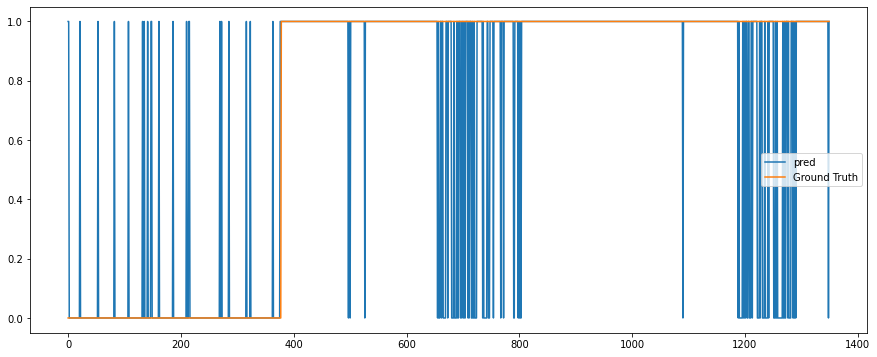

In [15]:
fig = plt.figure(figsize=(15, 6))
plt.plot(pred, label='pred')
plt.plot(np.array(Anode_Test_y), label='Ground Truth')
plt.legend()
plt.show()

In [16]:
anomaly_score = clf.score_samples(Anode_Test_X)

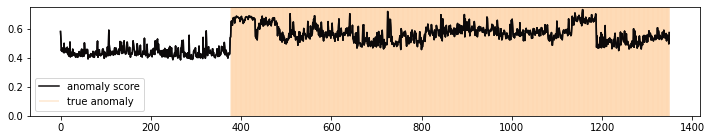

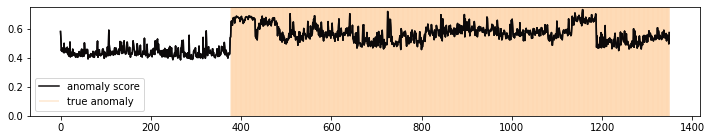

In [17]:
check_graph(-anomaly_score, np.array(Anode_Test_y))

### One-class SVM

In [18]:
clf = OneClassSVM().fit(Anode_Train_X)
pred = clf.predict(Anode_Test_X)
pred = np.where(pred==1, 0, 1)

In [19]:
confusion_matrix(Anode_Test_y, pred)

array([[201, 177],
       [ 64, 908]])

In [20]:
tn, fp, fn, tp = confusion_matrix(Anode_Test_y, pred).ravel()
(tn, fp, fn, tp)

(201, 177, 64, 908)

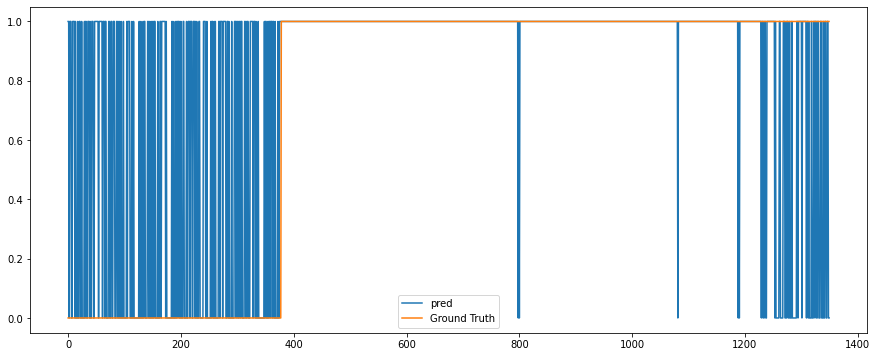

In [21]:
fig = plt.figure(figsize=(15, 6))
plt.plot(pred, label='pred')
plt.plot(np.array(Anode_Test_y), label='Ground Truth')
plt.legend()
plt.show()

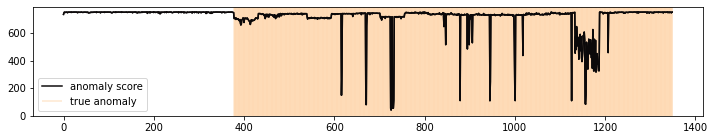

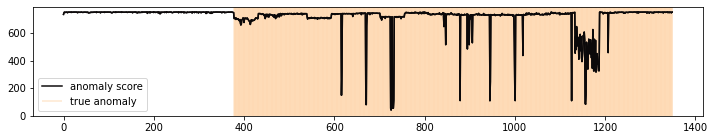

In [22]:
anomaly_score = clf.score_samples(Anode_Test_X)
check_graph(anomaly_score, np.array(Anode_Test_y))